In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3

from sklearn.datasets import make_blobs

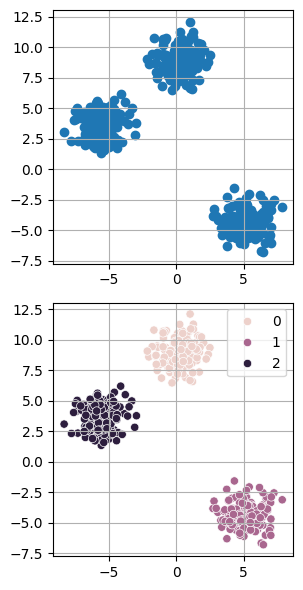

In [2]:

X,y = make_blobs(n_samples = 500,n_features =
2,centers = 3,random_state = 23)
fig, (axis, ax) = plt.subplots(2,
gridspec_kw={'height_ratios':[1,1]},
figsize=[3,6])
axis.grid(True)
axis.scatter(X[:,0], X[:,1])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y,
ax=ax)
ax.grid(True)
fig.tight_layout()
plt.show()

In [3]:
from sklearn.cluster import KMeans

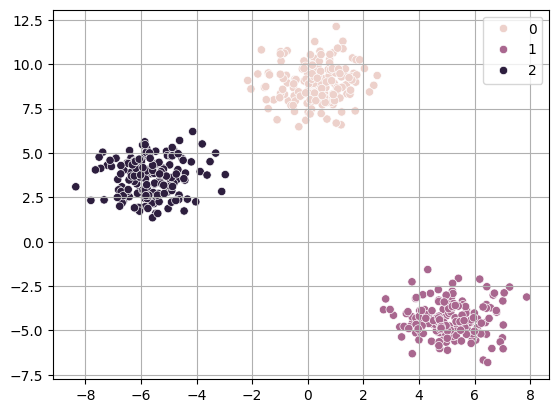

In [4]:
kmeans = KMeans(n_clusters=3)

predicted_labels = kmeans.fit_predict(X) # sioje vietoje klasterizuoja

ax = sns.scatterplot(x=X[:, 0],y=X[:,1], hue=predicted_labels )
ax.grid(True)
plt.show()

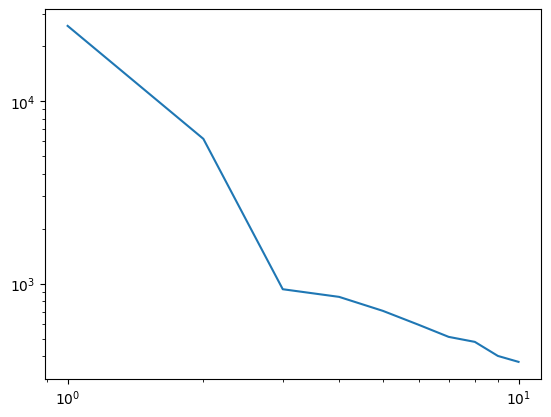

In [5]:
# kvadratiniu paklaidu suma
# inercijos paramemtras
# sum of squared errors

sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
ax = sns.lineplot(x=[*range(1, 11)], y=sse)
ax.loglog()
plt.show()

In [ ]:
#  Aruodas skelbimai
# Į kiek klasterių galima suskirstyti Vilniuje esančius sklebimus?
# X - features yra skelbimo koordinatės
# Ar galite suskaičiuoti kiekviename klasteryje esančią vidutinę būsto kainą?
# ?Atvaizduokite duoenis su mapbox()

In [6]:
SDB = sqlite3.connect('aruodas3.db')
Cs = SDB.cursor()

sql="""select * from aruododuomenys;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)
df = df_with_dubs.drop_duplicates()
df.head(2)

,plotas,kambariuskaicius,aukstas,aukstuskaicius,metai,pastatotipas,sildymas,irengimas,energetineklase,ilguma,platuma,miestas,kaina,rajonas
0,"34,93 m²",2,5,5,2023,Mūrinis,Centrinis kolektorinis,Įrengtas,None,54.701257,25.272667,Vilnius,173500,Šnipiškės
1,"66,64 m²",2,3,5,2003,Mūrinis,Centrinis,Įrengtas,A,54.705467,25.286944,Vilnius,205000,Žirmūnai


In [9]:
def set_plotas(x):
    plotas = x.replace(',', '.').split()[0]
    return float(plotas)

df['plotas'] = df['plotas'].apply(set_plotas)
df.head(2)

,plotas,kambariuskaicius,aukstas,aukstuskaicius,metai,pastatotipas,sildymas,irengimas,energetineklase,ilguma,platuma,miestas,kaina,rajonas
0,34.93,2,5,5,2023,Mūrinis,Centrinis kolektorinis,Įrengtas,None,54.701257,25.272667,Vilnius,173500,Šnipiškės
1,66.64,2,3,5,2003,Mūrinis,Centrinis,Įrengtas,A,54.705467,25.286944,Vilnius,205000,Žirmūnai


In [10]:
df['kv_kaina'] = round(df['kaina'] / df['plotas'], 2)
df.head(2)

,plotas,kambariuskaicius,aukstas,aukstuskaicius,metai,pastatotipas,sildymas,irengimas,energetineklase,ilguma,platuma,miestas,kaina,rajonas,kv_kaina
0,34.93,2,5,5,2023,Mūrinis,Centrinis kolektorinis,Įrengtas,None,54.701257,25.272667,Vilnius,173500,Šnipiškės,4967.08
1,66.64,2,3,5,2003,Mūrinis,Centrinis,Įrengtas,A,54.705467,25.286944,Vilnius,205000,Žirmūnai,3076.23


In [11]:

vilnius = df[df['miestas'] == 'Vilnius']
vilnius.dropna(inplace=True)
vilnius.head(2)

,plotas,kambariuskaicius,aukstas,aukstuskaicius,metai,pastatotipas,sildymas,irengimas,energetineklase,ilguma,platuma,miestas,kaina,rajonas,kv_kaina
1,66.64,2,3,5,2003,Mūrinis,Centrinis,Įrengtas,A,54.705467,25.286944,Vilnius,205000,Žirmūnai,3076.23
3,98.00,3,2,5,2008,Mūrinis,Centrinis,Įrengtas,A+,54.691637,25.284638,Vilnius,615000,Šnipiškės,6275.51


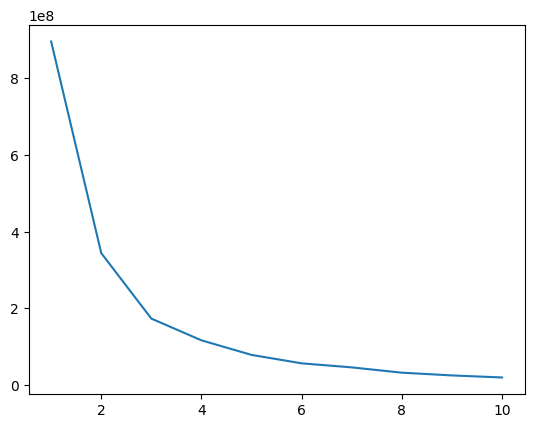

In [13]:
X = vilnius[['ilguma', 'platuma', 'kv_kaina']].values


sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
ax = sns.lineplot(x=[*range(1, 11)], y=sse)
# ax.semilogy()
plt.show()

#  3 arba 4 klausteriai arba 10

In [14]:
kmeans = KMeans(n_clusters=5)
vilnius['cluster'] = kmeans.fit_predict(X)  # Add cluster labels to DataFrame

# predicted_labels = kmeans.fit_predict(X) # sioje vietoje klasterizuoja

# ax = sns.scatterplot(x=X[:, 0],y=X[:,1], hue=predicted_labels )
# ax.grid(True)
# plt.show()

In [15]:
import plotly.express as px

In [16]:
# Create a Mapbox scatter map
# fig = px.scatter_mapbox(vilnius, lat='ilguma', lon='platuma', text='rajonas', zoom=3, height=600)
fig = px.scatter_mapbox(vilnius, lat='ilguma', lon='platuma', color='cluster', text='rajonas',
                        zoom=5, height=600, title="Clustered Coordinates on Map")
# Set Mapbox style (you can choose other Mapbox styles)
fig.update_layout(mapbox_style="open-street-map")

# Show the map
fig.show()

In [ ]:
vilnius

In [18]:
vilnius_gr = round(vilnius.groupby('cluster')['kv_kaina'].mean())
vilnius_gr

cluster
0    4096.0
1    2212.0
2    6811.0
3    3123.0
4    5178.0
Name: kv_kaina, dtype: float64

In [19]:
vln_rj = vilnius.groupby('cluster')['rajonas'].unique()
for cluster, rajonas in vln_rj.items():
    print(f"Cluster {cluster}: {', '.join(rajonas)}")

Cluster 0: Baltupiai, Karoliniškės, Pilaitė, Naujamiestis, Verkiai, Viršuliškės, Šnipiškės, Pašilaičiai, Žirmūnai, Lazdynėliai, Bajorai, Burbiškės, Naujininkai, Antakalnis, Šeškinė, Kalnėnai, Užupis, Senamiestis, Žvėrynas, Kairėnai, Visoriai, Justiniškės, Santariškės, Markučiai, Rasos, Vilkpėdė
Cluster 1: Pašilaičiai, Pilaitė, Naujamiestis, Jeruzalė, Fabijoniškės, Rasos, Naujoji Vilnia, Bajorai, Baltupiai, Žirmūnai, Karoliniškės, Šeškinė, Santariškės, Antakalnis, Žemieji Paneriai, Lazdynai, Naujininkai, Šnipiškės, Tarandė, Kalnėnai, Žvėrynas, Justiniškės, Balsiai
Cluster 2: Šnipiškės, Naujamiestis, Senamiestis, Paupys, Žvėrynas, Markučiai
Cluster 3: Žirmūnai, Šnipiškės, Pašilaičiai, Baltupiai, Fabijoniškės, Pilaitė, Balsiai, Lazdynėliai, Justiniškės, Kalnėnai, Naujamiestis, Jeruzalė, Bajorai, Karoliniškės, Viršuliškės, Vilkpėdė, Naujininkai, Tarandė, Santariškės, Šeškinė, Antakalnis, Visoriai, Lazdynai, Verkiai, Žvėrynas, Burbiškės
Cluster 4: Užupis, Šnipiškės, Markučiai, Naujamiestis,

In [ ]:
# GirdSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV # su gridsearchcv tuninsime parametrus
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 6 + 1),
'init': ['k-means++', 'random'],
'n_init': [5, 10, 15],
'max_iter': [100, 200, 300, 400, 500],
'tol': [0.0001, 0.001, 0.01],
'algorithm': ['auto', 'full', 'elkan'],
'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'elkan', 'init': 'random', 'max_iter': 100, 'n_clusters': 6, 'n_init': 10, 'random_state': 100, 'tol': 0.001}
Optimal number of clusters based on parameter grid: 6


In [21]:
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 10 + 1),
'init': ['k-means++', 'random'],
'n_init': [5, 10, 15],
'max_iter': [100, 200, 300, 400, 500],
'tol': [0.0001, 0.001, 0.01],
'algorithm': ['auto', 'full', 'elkan', 'lloyd'],
'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 10, 'n_init': 15, 'random_state': 100, 'tol': 0.001}
Optimal number of clusters based on parameter grid: 10


In [22]:
# Define the parameter grid
param_grid = {
'n_clusters': range(2, 10 + 1)
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'n_clusters': 10}
Optimal number of clusters based on parameter grid: 10


In [ ]:
# aruodo - pridėti kainą už 1 kv. m, pritaikyti ir elbow metodą, ir gridsearch'ą
# du grafikai - su klasterių kiekiu iš elbow metodo
# grafikas - su klasterių kiekiu, nurodant parametrus iš gridsearchcv

In [ ]:
vilnius_check = vilnius[['ilguma', 'platuma', 'kv_kaina']].dropna()
vilnius_check.head(2)

,ilguma,platuma,kv_kaina
1,54.705467,25.286944,3076.23
3,54.691637,25.284638,6275.51


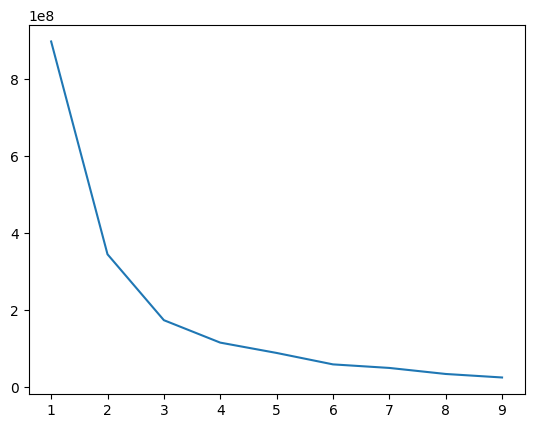

In [29]:
# SUM OF SQUARED ERROR
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(vilnius_check[['ilguma', 'platuma', 'kv_kaina']])
    sse.append(km.inertia_)

ax = sns.lineplot(x=[*range(1, 10)], y=sse)
plt.show()

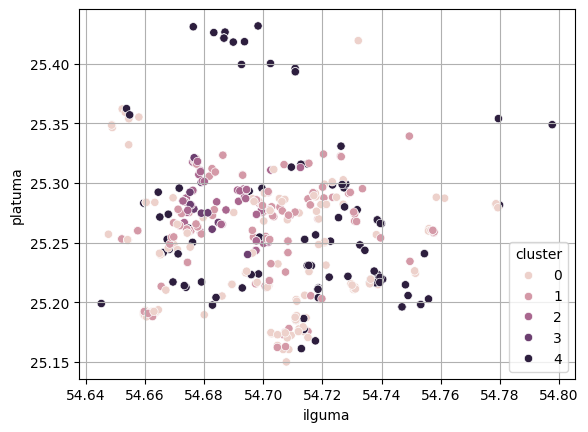

In [34]:
kmeans = KMeans(n_clusters=5)

predicted_labels = kmeans.fit_predict(vilnius_check[['ilguma', 'platuma', 'kv_kaina']])
vilnius_check['cluster'] = predicted_labels

ax = sns.scatterplot(data=vilnius_check, x='ilguma', y='platuma', hue='cluster')
ax.grid(True)
plt.show()

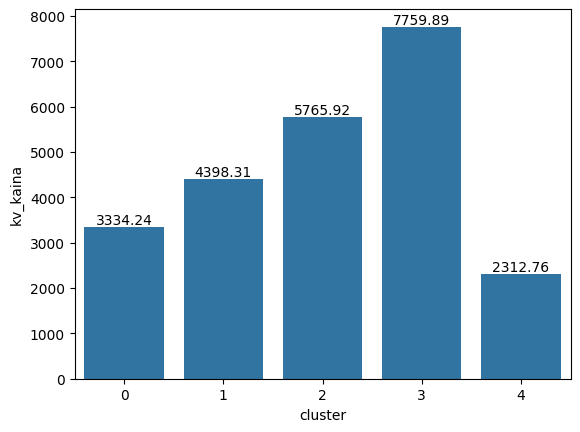

In [35]:
df_for_plot = vilnius_check.groupby('cluster').mean().reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(data=df_for_plot, x='cluster', y='kv_kaina')
for container in ax.containers:
    ax.bar_label(container) 
plt.show()

In [36]:
vilnius_check = vilnius[['ilguma', 'platuma', 'kv_kaina']].dropna()

In [37]:
# Define the parameter grid
param_grid = {
    'n_clusters': range(2, 10 + 1),
    'init': ['k-meanns++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan', 'lloyd'],
    'random_state': [0, 42, 100, None]
}

# Create the KMeans object
kmeans = KMeans()

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(vilnius_check) # fitinam X, kurį susigeneravom darbo pradžioje

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

Best hyperparameters:  {'algorithm': 'lloyd', 'init': 'random', 'max_iter': 500, 'n_clusters': 10, 'n_init': 15, 'random_state': None, 'tol': 0.0001}
Optimal number of clusters based on parameter grid: 10


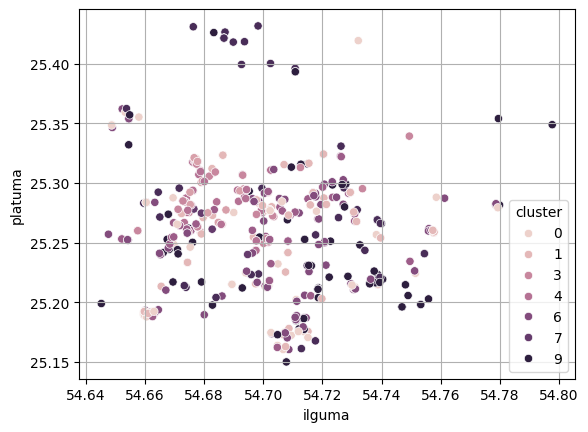

In [38]:
kmeans = KMeans(algorithm='lloyd', init='random', max_iter=500, n_clusters=10, n_init=15, random_state=None, tol=0.0001)

predicted_labels = kmeans.fit_predict(vilnius_check[['ilguma', 'platuma', 'kv_kaina']])
vilnius_check['cluster'] = predicted_labels

ax = sns.scatterplot(data=vilnius_check, x='ilguma', y='platuma', hue='cluster')

ax.grid(True)

plt.show()

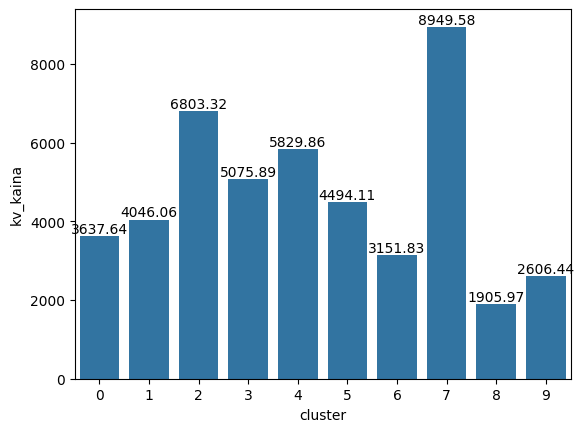

In [39]:
df_for_plot = vilnius_check.groupby('cluster').mean().reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(data=df_for_plot, x='cluster', y='kv_kaina')
for container in ax.containers:
    ax.bar_label(container) 
plt.show()

In [41]:
fig = px.scatter_mapbox(data_frame=vilnius_check, lon='platuma', lat='ilguma', zoom=11, color='cluster')
fig.update_layout(mapbox_style='open-street-map')
fig.update_traces(hovertemplate='X=%{lat}<br>Y=%{lon}<br>cluster=%{marker.color}<br>Kaina_kv=%{customdata[0]}', customdata=vilnius_check[['kv_kaina']])
fig.update_layout(width=800, height=600)
fig.show()